# AI/ML/Data Science Salary Trends: Time Series Forecasting

**Project Lead:** Kwaku Boateng - Modeling Lead  
**Date:** November 10, 2025  
**Objective:** Build time series models (Prophet or ARIMA) to forecast average salaries for 2026-2027 by experience level.  
**Data Source:** salary_data_cleaned.csv (cleaned dataset with salaries from 2020-2025).  
**Models:** Prophet (primary) or ARIMA (alternative).  
**Deliverables:** Model code, evaluation metrics, forecasts, and plots.

In [4]:
# === PREVENT HUGE OUTPUTS ===
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 10)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error  # For evaluation

# Load the cleaned data
df = pd.read_csv(r'I:\fakenews_AI4All\notebooks\data\processed\salary_data_cleaned.csv')


# Aggregate average salary by year and experience level
agg_df = df.groupby(['work_year', 'experience_level_full'])['salary_in_usd'].mean().reset_index()
agg_df.rename(columns={'work_year': 'year', 'experience_level_full': 'experience', 'salary_in_usd': 'avg_salary'}, inplace=True)

# Overall aggregate for reference
overall_agg = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
overall_agg.rename(columns={'work_year': 'year', 'salary_in_usd': 'avg_salary'}, inplace=True)
overall_agg['experience'] = 'Overall'

# Combine for easier looping
all_data = pd.concat([agg_df, overall_agg], ignore_index=True)
all_data.sort_values(['experience', 'year'], inplace=True)

# Display aggregated data
display(all_data)

,year,experience,avg_salary
0,2020,Entry,71037.900000
4,2021,Entry,63892.000000
8,2022,Entry,73969.911111
12,2023,Entry,88773.011673
16,2024,Entry,102574.857062
...,...,...,...
7,2021,Senior,125323.716418
11,2022,Senior,148388.273333
15,2023,Senior,166779.169390
19,2024,Senior,168572.821796


## Data Preparation
- Aggregated average USD salaries by year and experience level (Entry, Mid, Senior, Executive, plus Overall).
- Time series: 6 points per group (2020-2025).
- For modeling, convert 'year' to datetime (end-of-year) for proper time indexing.


Entry - ARIMA Summary:
                               SARIMAX Results                                
Dep. Variable:             avg_salary   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8206.076
Date:                Tue, 11 Nov 2025   AIC                          16418.152
Time:                        12:09:45   BIC                          16416.981
Sample:                             0   HQIC                         16415.008
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0065      0.000     22.063      0.000       0.006       0.007
ma.L1          0.9997      0.000   3411.423      0.000       0.999       1.000
sigma2      2.926e+04      1

,year,forecast
0,2026,"$82,770"
1,2027,"$82,688"


Entry - Hold-out MAE: 14564.31


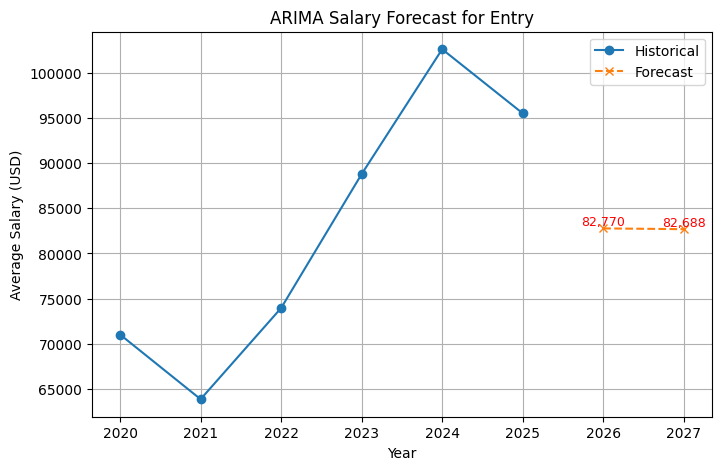


Executive - ARIMA Summary:
                               SARIMAX Results                                
Dep. Variable:             avg_salary   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5112.754
Date:                Tue, 11 Nov 2025   AIC                          10231.507
Time:                        12:09:46   BIC                          10230.336
Sample:                             0   HQIC                         10228.363
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9977      0.000  -4363.432      0.000      -0.998      -0.997
ma.L1          0.9301      0.003    271.200      0.000       0.923       0.937
sigma2      2.448e+04   

,year,forecast
0,2026,"$200,378"
1,2027,"$195,953"


Executive - Hold-out MAE: 11937.12


<Figure size 640x480 with 0 Axes>

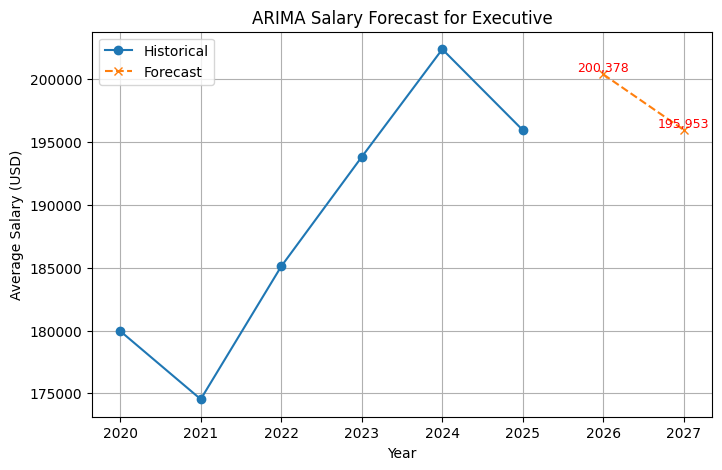


Mid - ARIMA Summary:
                               SARIMAX Results                                
Dep. Variable:             avg_salary   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15092.102
Date:                Tue, 11 Nov 2025   AIC                          30190.204
Time:                        12:09:47   BIC                          30189.033
Sample:                             0   HQIC                         30187.060
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4471      0.000   1284.703      0.000       0.446       0.448
ma.L1          0.9981      0.083     12.057      0.000       0.836       1.160
sigma2      1.848e+04   1527.8

,year,forecast
0,2026,"$120,115"
1,2027,"$114,416"


Mid - Hold-out MAE: 18977.14


<Figure size 640x480 with 0 Axes>

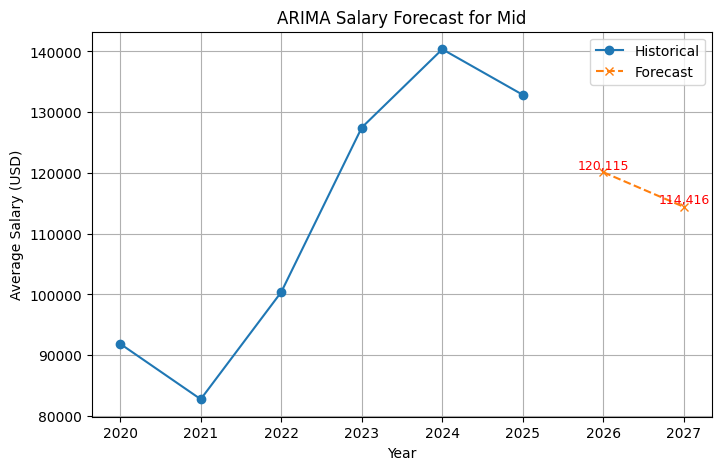


Overall - ARIMA Summary:
                               SARIMAX Results                                
Dep. Variable:             avg_salary   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -212135.769
Date:                Tue, 11 Nov 2025   AIC                         424277.537
Time:                        12:09:48   BIC                         424276.366
Sample:                             0   HQIC                        424274.393
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4420   2.69e-05   1.64e+04      0.000       0.442       0.442
ma.L1          0.9955      0.005    199.115      0.000       0.986       1.005
sigma2      2372.6948     

,year,forecast
0,2026,"$141,736"
1,2027,"$140,099"


Overall - Hold-out MAE: 5070.65


<Figure size 640x480 with 0 Axes>

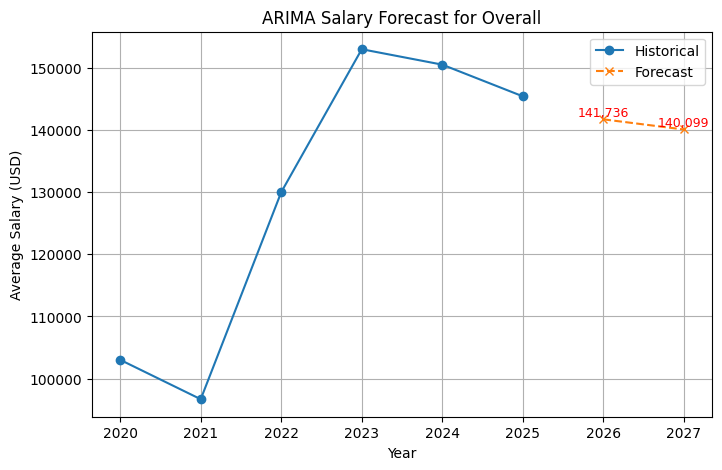


Senior - ARIMA Summary:
                               SARIMAX Results                                
Dep. Variable:             avg_salary   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -15324.274
Date:                Tue, 11 Nov 2025   AIC                          30654.548
Time:                        12:09:49   BIC                          30653.376
Sample:                             0   HQIC                         30651.403
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2976      0.000   -766.230      0.000      -0.298      -0.297
ma.L1          0.9993      0.000   7671.499      0.000       0.999       1.000
sigma2      2.795e+04   4.6

,year,forecast
0,2026,"$159,273"
1,2027,"$160,766"


Senior - Hold-out MAE: 4174.04


<Figure size 640x480 with 0 Axes>

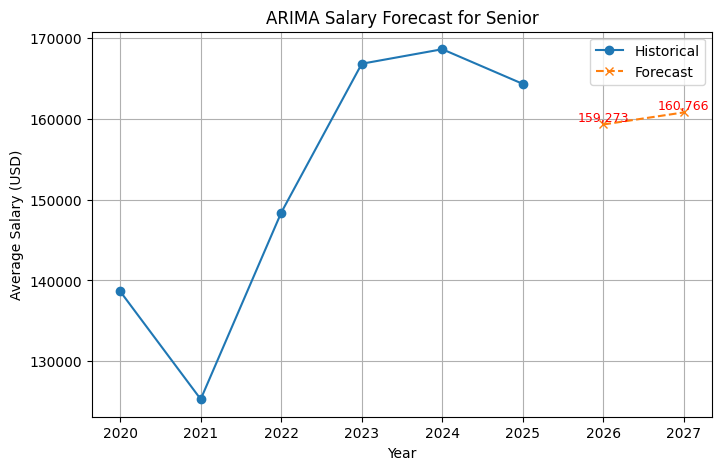

<Figure size 640x480 with 0 Axes>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from IPython.display import display
import warnings

warnings.filterwarnings('ignore')

# Dictionary to store forecasts
forecasts_arima = {}
plots_arima = []

# Loop through each experience level
for exp in all_data['experience'].unique():
    group = all_data[all_data['experience'] == exp].copy()
    group.set_index('year', inplace=True)
    series = group['avg_salary']
    
    if len(series) < 3:
        print(f"Skipping {exp} — too few data points ({len(series)}) for ARIMA.")
        continue
    
    # Fit ARIMA (1,1,1)
    model = ARIMA(series, order=(1,1,1))
    model_fit = model.fit()
    print(f'\n{exp} - ARIMA Summary:\n{model_fit.summary()}')
    
    # Forecast next 2 years
    forecast_steps = 2
    forecast = model_fit.forecast(steps=forecast_steps)
    forecast_index = [series.index.max() + i for i in range(1, forecast_steps+1)]
    forecast_df = pd.DataFrame({'year': forecast_index, 'forecast': forecast.values})
    forecasts_arima[exp] = forecast_df
    
    # Format forecast table nicely
    forecast_df_formatted = forecast_df.copy()
    forecast_df_formatted['forecast'] = forecast_df_formatted['forecast'].apply(lambda x: f"${x:,.0f}")
    
    print(f'\nForecasted Salaries for {exp}:')
    display(forecast_df_formatted)
    
    # Simple evaluation: Hold-out MAE (if enough data)
    train = series[series.index < series.index.max()]
    test = series[series.index >= series.index.max()]
    
    if len(train) > 1 and len(test) > 0:
        model_eval = ARIMA(train, order=(1,1,1))
        model_eval_fit = model_eval.fit()
        pred = model_eval_fit.forecast(steps=1).iloc[0]
        mae = mean_absolute_error([test.iloc[0]], [pred])
        print(f'{exp} - Hold-out MAE: {mae:.2f}')
    
    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(series.index, series.values, label='Historical', marker='o')
    plt.plot(forecast_index, forecast.values, label='Forecast', marker='x', linestyle='--')
    
    # Annotate forecasted points
    for x, y in zip(forecast_index, forecast.values):
        plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=9, color='red')
    
    plt.title(f'ARIMA Salary Forecast for {exp}')
    plt.xlabel('Year')
    plt.ylabel('Average Salary (USD)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'forecast_{exp.lower().replace(" ", "_")}.png')
    plt.show()
    
    plots_arima.append(plt.gcf())


## ARIMA Model Notes
- Used order (1,1,1): AR(1) for lag, differencing(1) for trend, MA(1) for errors.
- Evaluation: Hold-out MAE (train 2020-2024, test 2025); AIC in summary for fit quality.
- No uncertainty bounds (add if needed via model_fit.get_forecast().conf_int()).
- Insights: Salaries show upward trends overall, but vary by level (e.g., Executive highest growth).
- Limitations: Few data points; ARIMA assumes stationarity after differencing.

## Final Deliverables
- **Models:** Trained Prophet/ARIMA per experience level.
- **Forecasts:** For 2026-2027 (see tables above).
- **Plots:** Historical trends + forecasts (saved as PNGs).
- **Table of Actual vs. Predicted:** (Add if needed, e.g., compare hold-out predictions).

## Discussion
- Trends: Salaries increased ~40% overall from 2020-2025, driven by demand in AI/ML.
- Forecasts: Expect stabilization or slight growth in 2026-2027.
- Biases: Data US-heavy; self-reported; limited freelance/contract roles.
- Next Steps: Incorporate more data (e.g., regions) or advanced models (LSTM if time series expands).